[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/14_keras_IMDB_MLP_RNN.ipynb)

>[1.数据准备](#scrollTo=YDESlefrXyfd)

>[2.建立模型](#scrollTo=jUFdKIuqYAID)

>[3.训练模型](#scrollTo=OkbAT5b6Yuhu)

>[4.评估模型](#scrollTo=mSL_tn4cfnEy)



# 1.数据准备

In [4]:
import urllib.request
import os
import tarfile

url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="aclImdb_v1.tar.gz"

if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)
    
if not os.path.exists("aclImdb"):
    tfile = tarfile.open("aclImdb_v1.tar.gz", 'r:gz')
    result=tfile.extractall('')
    
    
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import numpy as np
np.random.seed(10)


import re
re_tag = re.compile(r'<[^>]+>')

def rm_tags(text):
    return re_tag.sub('', text)
  
  
  
import os
def read_files(filetype):
    path = "aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
        
    print('read',filetype, 'files:',len(file_list))
       
    all_labels = ([1] * 12500 + [0] * 12500) 
    
    all_texts  = []
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_labels,all_texts

  
y_train,train_text=read_files("train")

y_test,test_text=read_files("test")

#先读取所有文章建立字典，限制字典的数量为nb_words=3800

token = Tokenizer(num_words=3800)
token.fit_on_texts(train_text)


x_train_seq = token.texts_to_sequences(train_text)
x_test_seq  = token.texts_to_sequences(test_text)

#截长补短，让所有影评所产生的数字序列长度一样
x_train = sequence.pad_sequences(x_train_seq, maxlen=380)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=380)

read train files: 25000
read test files: 25000


# 2.建立模型

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN


model = Sequential()



model.add(Embedding(output_dim=32,
                    input_dim=3800, 
                    input_length=380))
model.add(Dropout(0.35))

model.add(SimpleRNN(units=16))

model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.35))

model.add(Dense(units=1,activation='sigmoid' ))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
_________________________________________________________________


# 3.训练模型

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history =model.fit(x_train, y_train,batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 23s - loss: 0.5242 - acc: 0.7358 - val_loss: 0.5150 - val_acc: 0.7966
Epoch 2/10
 - 23s - loss: 0.3212 - acc: 0.8672 - val_loss: 0.5052 - val_acc: 0.7672
Epoch 3/10
 - 23s - loss: 0.2874 - acc: 0.8858 - val_loss: 0.6058 - val_acc: 0.7126
Epoch 4/10
 - 23s - loss: 0.2510 - acc: 0.8998 - val_loss: 0.5657 - val_acc: 0.7212
Epoch 5/10
 - 23s - loss: 0.2217 - acc: 0.9134 - val_loss: 0.8797 - val_acc: 0.6778
Epoch 6/10
 - 23s - loss: 0.2044 - acc: 0.9219 - val_loss: 0.6852 - val_acc: 0.7740
Epoch 7/10
 - 23s - loss: 0.1750 - acc: 0.9353 - val_loss: 0.8827 - val_acc: 0.7570
Epoch 8/10
 - 23s - loss: 0.1502 - acc: 0.9433 - val_loss: 0.6062 - val_acc: 0.8140
Epoch 9/10
 - 23s - loss: 0.1479 - acc: 0.9456 - val_loss: 0.6770 - val_acc: 0.8006
Epoch 10/10
 - 23s - loss: 0.1223 - acc: 0.9543 - val_loss: 0.8388 - val_acc: 0.7950


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

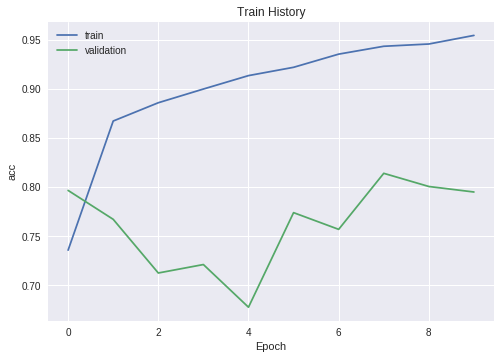

In [8]:
show_train_history(train_history,'acc','val_acc')

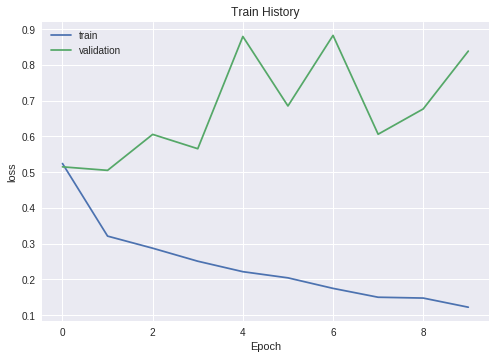

In [9]:
show_train_history(train_history,'loss','val_loss')

# 4.评估模型

In [10]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

25000/25000 [==============================] - 15s 592us/step


0.85072